In [1]:
import seaborn as sns
import os, cv2, random
import numpy as np
from utils.data_utils import load_ava, clean_data
import matplotlib.pyplot as plt
from utils.score_utils import mean_score, std_score

In [3]:
# directory where we are going to work on
workdir = '/home/frubio/AVA/'

# annotations and images directories
train_dir_annotations = os.path.join(workdir, 'AVA_dataset')
train_dir_images = os.path.join(workdir, 'AVA_images')

x_train, y_train = load_ava(train_dir_annotations)
x_train, y_train = clean_data(train_dir_images, x_train, y_train)

# metrics regarding score distribution
mean_scores = np.sum(y_train * np.arange(1, 11), axis = 1) / (np.sum(y_train, axis = 1))
mean_scores_rep = np.repeat(mean_scores, 10, axis = 0).reshape(len(y_train), 10)
stds_scores = np.sqrt((np.sum(np.abs(np.arange(1, 11) - mean_scores_rep) ** 2 * y_train, axis = 1)) / (np.sum(y_train, axis = 1)))

Total images lost:  178
Original dataset shape:  (255530,)
Resulting dataset shape:  (255352,)


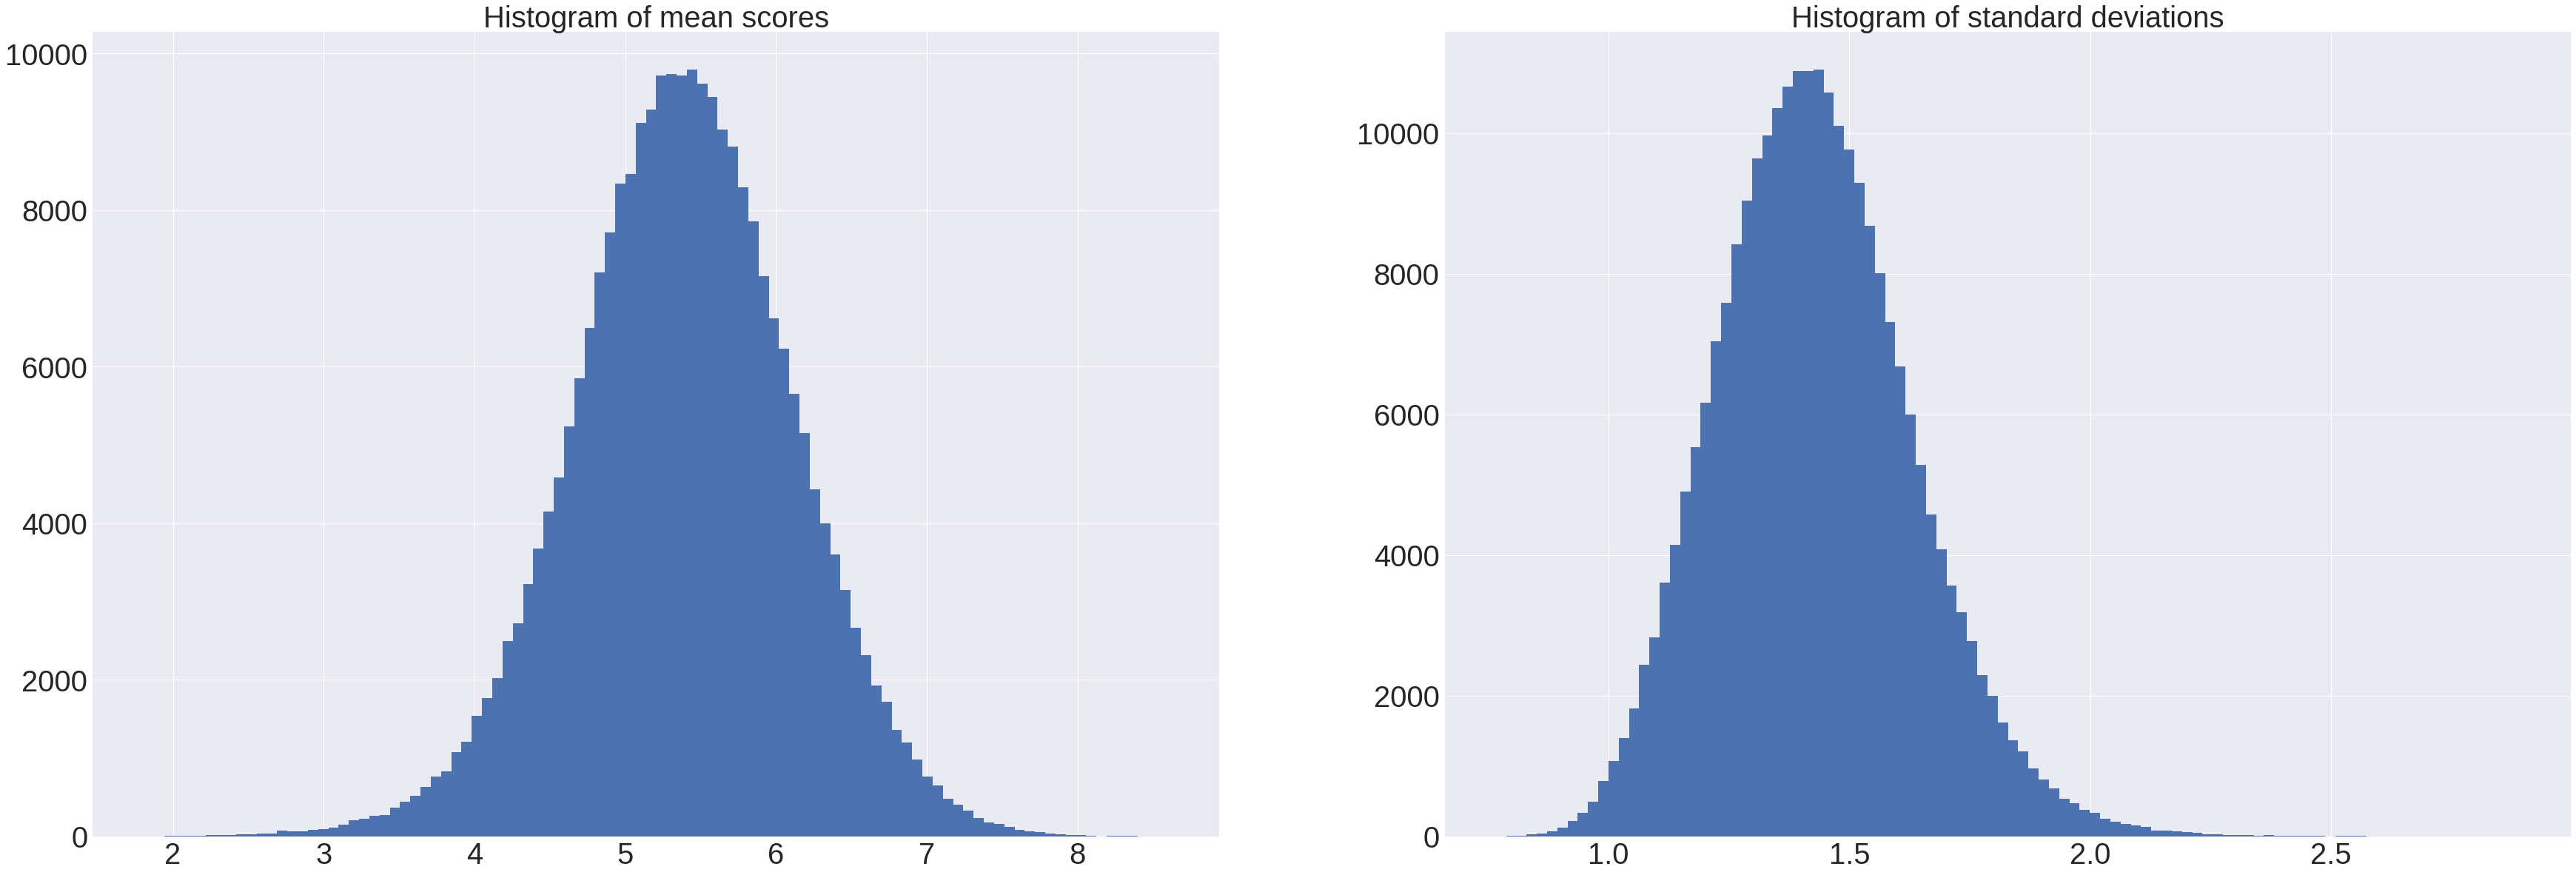

In [4]:
# rating distribution mean over all the dataset
plt.figure(figsize=(60, 20))
plt.subplot(1, 2, 1)
plt.title('Histogram of mean scores', fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.hist(mean_scores, bins = 100)
plt.subplot(1, 2, 2)
plt.title('Histogram of standard deviations', fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.hist(stds_scores, bins = 100)
# plt.subplot(2, 2, 4)
# plt.title('Histogram joint')
# plt.grid(False)
# plt.hist2d(mean_scores, stds_scores, bins=100, cmap = 'Blues')
plt.savefig('mean_std.png')
plt.show()

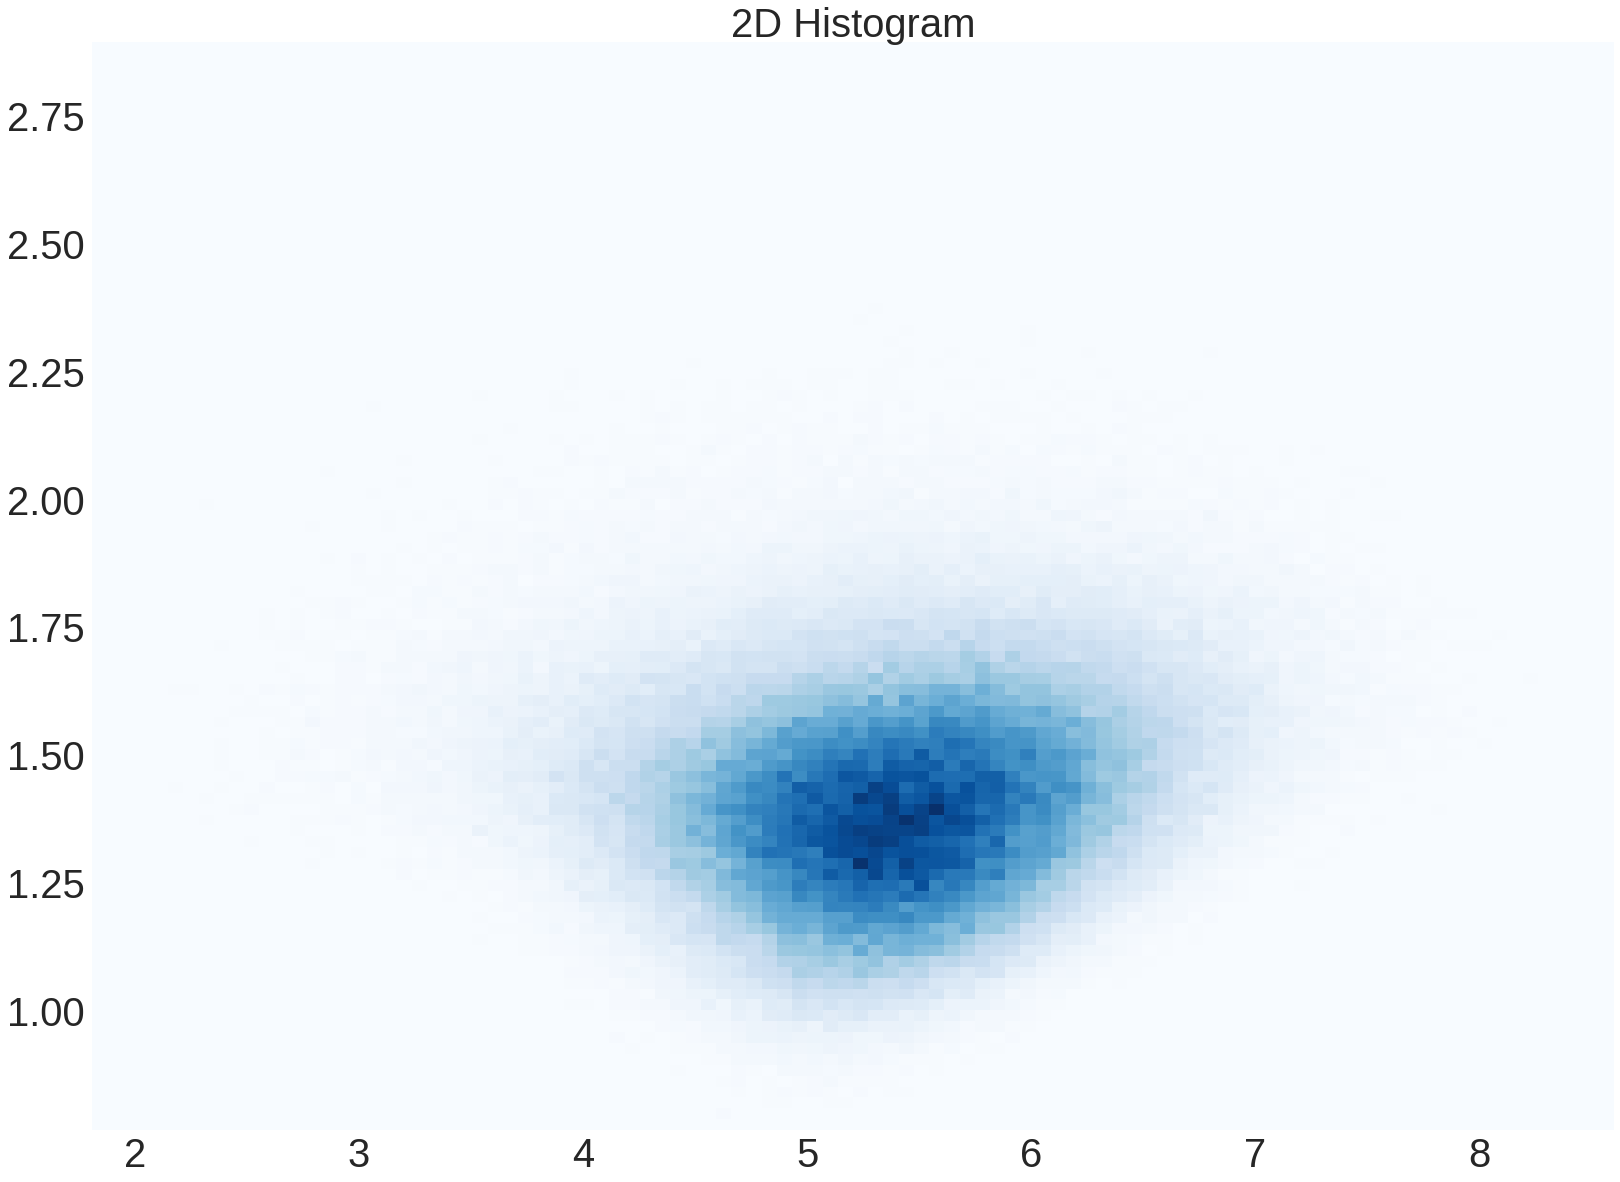

In [5]:
plt.figure(figsize=(60, 20))
plt.subplot(1, 2, 1)
plt.title('2D Histogram', fontsize = 40)
plt.grid(False)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.hist2d(mean_scores, stds_scores, bins=100, cmap = 'Blues')
plt.savefig('joint.png')
plt.show()

In [5]:
stack = np.stack((mean_scores, stds_scores), axis=-1)

In [6]:
great_7 = np.where(mean_scores > 6.8)
g7_lower_12 = np.where(stds_scores[great_7] < 1.2)
g7_greater_2 = np.where(stds_scores[great_7] > 2)

lower_3 = np.where(mean_scores < 3)
l3_lower_12 = np.where(stds_scores[lower_3] < 1.2)
l3_greater_2 = np.where(stds_scores[lower_3] > 2)

In [7]:
stack[lower_3][l3_greater_2]
#x_train[great_7][equal_14][0]

array([[2.68421053, 2.30307049],
       [2.84496124, 2.06307837],
       [2.56050955, 2.00659002],
       [2.97      , 2.33069867],
       [2.82978723, 2.06312384],
       [2.51592357, 2.09223277],
       [2.59340659, 2.20584649],
       [2.3579235 , 2.20245953],
       [2.33027523, 2.21514477],
       [2.5989011 , 2.41194712],
       [2.65966387, 2.48060745],
       [2.80882353, 2.13769203],
       [2.85423729, 2.0458898 ],
       [2.16086957, 2.19803254],
       [2.87573964, 2.15213163],
       [2.13705584, 2.07356108],
       [1.9962406 , 2.07319939],
       [2.90510949, 2.05320188],
       [2.61256545, 2.14783164],
       [2.99375   , 2.0650296 ]])

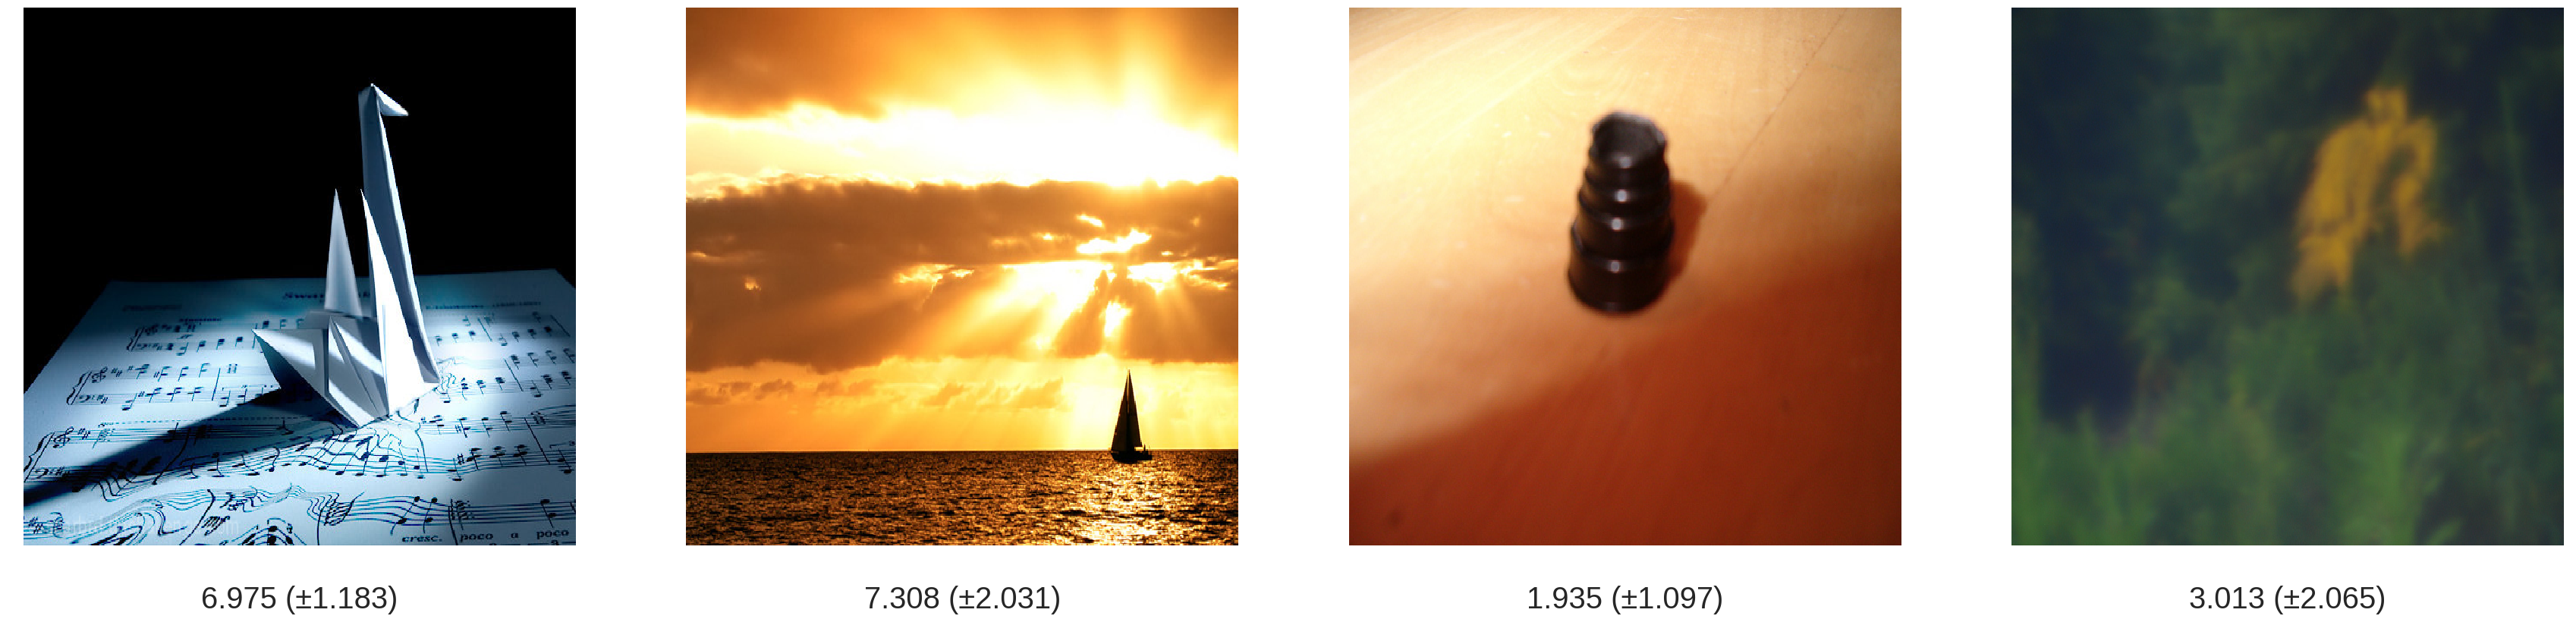

In [13]:
image_id_1 = x_train[great_7][g7_lower_12][0]
image_id_2 = x_train[great_7][g7_greater_2][4]
image_id_3 = x_train[lower_3][l3_lower_12][0]
image_id_4 = x_train[lower_3][l3_greater_2][19]

image_list = [image_id_1, image_id_2, image_id_3, image_id_4]

plt.figure(figsize=(60, 60))

for i in range(len(image_list)):
    # pick random training image
    case = os.path.join(train_dir_images, str(image_list[i]) + '.jpg')

    # open image with opencv and visualize it
    ax = plt.subplot(4, 4, i+1)

    image = cv2.cvtColor(cv2.imread(case, 1), cv2.COLOR_BGR2RGB) # cv2 loads an image BGR rather than RGB
    punt = y_train[x_train == image_list[i]][0]
    punt = punt / np.sum(punt)
    #plt.title('{} ({}{})'.format(round(mean_score(punt), 3), chr(177), round(std_score(punt), 3)))
    #plt.xlabel('{} ({}{})'.format(round(mean_score(punt), 3), chr(177), round(std_score(punt), 3)), fontsize=45, y=-0.5)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(image, aspect = 'auto')
    text = '{} ({}{})'.format(round(mean_score(punt), 3), chr(177), round(std_score(punt), 3))
    plt.text(0.5, -0.1, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 40)
    plt.axis('off')

#     # plot the score distribution of the image
#     plt.subplot(2, 2, 2)

#     punt = y_train[x_train == image_id][0]
#     punt = punt / np.sum(punt)
#     plt.title('Score distribution')
#     plt.bar(np.arange(1,11), height = punt, width = 0.9)
#     plt.show()
#     print('Real Score: {} ({}{})'.format(round(mean_score(punt), 3), chr(177), round(std_score(punt), 3)))
plt.save
plt.show()